In [5]:
# import source code
import sys, os, glob
from numpy import *
sys.path.append('new_src')
from Preparation import *
from PosteriorSampler import *
from Analysis_new import *
from Restraint import *
from init_res import *

In [6]:
#########################################
# Lets' create input files for BICePs
############ Preparation ################
# Specify necessary argument values
path='NOE/*txt'        # precomputed distances for each state
states=100                    # number of states
indices='atom_indice_noe.txt'   # atom indices of each distance
exp_data='noe_distance.txt'  # experimental NOE data 
top='pdbs_guangfeng/0.pdb'    # topology file 
data_dir=path                 # directory of precomputed data 
dataFiles = 'noe_J'           # output directory of BICePs formated input file from this scripts
out_dir=dataFiles               

#p=Preparation('noe',states=states,indices=indices,exp_data=exp_data,top=top,data_dir=data_dir)  # the type of data needs to be specified {'noe', 'J', 'cs_H', etc}
#p.write(out_dir=out_dir)     # raw data will be converted to a BICePs readable format to the folder specified

In [7]:
#########################################
# Let's create our ensemble of structures
############ Initialization #############    
# Specify necessary argument values
data = sort_data(dataFiles)   # sorting data in the folder and figure out what types of data are used
print data
print len(data),len(data[0])
#sys.exit(1)
energies_filename =  'albocycline_QMenergies.dat'
energies = loadtxt(energies_filename)
energies = loadtxt(energies_filename)*627.509  # convert from hartrees to kcal/mol
energies = energies/0.5959   # convert to reduced free energies F = f/kT
energies -= energies.min()  # set ground state to zero, just in case
outdir = 'results_ref_normal'
# Temporarily placing the number of steps here...
nsteps = 100 # number of steps of MCMC simulation

# Make a new directory if we have to
if not os.path.exists(outdir):
    os.mkdir(outdir)

[['noe_J/0.J', 'noe_J/0.noe'], ['noe_J/1.J', 'noe_J/1.noe'], ['noe_J/2.J', 'noe_J/2.noe'], ['noe_J/3.J', 'noe_J/3.noe'], ['noe_J/4.J', 'noe_J/4.noe'], ['noe_J/5.J', 'noe_J/5.noe'], ['noe_J/6.J', 'noe_J/6.noe'], ['noe_J/7.J', 'noe_J/7.noe'], ['noe_J/8.J', 'noe_J/8.noe'], ['noe_J/9.J', 'noe_J/9.noe'], ['noe_J/10.J', 'noe_J/10.noe'], ['noe_J/11.J', 'noe_J/11.noe'], ['noe_J/12.J', 'noe_J/12.noe'], ['noe_J/13.J', 'noe_J/13.noe'], ['noe_J/14.J', 'noe_J/14.noe'], ['noe_J/15.J', 'noe_J/15.noe'], ['noe_J/16.J', 'noe_J/16.noe'], ['noe_J/17.J', 'noe_J/17.noe'], ['noe_J/18.J', 'noe_J/18.noe'], ['noe_J/19.J', 'noe_J/19.noe'], ['noe_J/20.J', 'noe_J/20.noe'], ['noe_J/21.J', 'noe_J/21.noe'], ['noe_J/22.J', 'noe_J/22.noe'], ['noe_J/23.J', 'noe_J/23.noe'], ['noe_J/24.J', 'noe_J/24.noe'], ['noe_J/25.J', 'noe_J/25.noe'], ['noe_J/26.J', 'noe_J/26.noe'], ['noe_J/27.J', 'noe_J/27.noe'], ['noe_J/28.J', 'noe_J/28.noe'], ['noe_J/29.J', 'noe_J/29.noe'], ['noe_J/30.J', 'noe_J/30.noe'], ['noe_J/31.J', 'noe_J/31.no

In [8]:
######################
# Main:
######################

lambda_values = [0.0,0.5,1.0]
res = list_res(data)
print res
ref=['uniform','exp']
uncern=[[0.05,20.0,np.log(1.02)],[0.05,5.0,np.log(1.02)]]
gamma = [0.05,2.0,np.log(1.02)]
#sys.exit()
for j in lambda_values:
    verbose = True#False
    lam = j
    # We will instantiate a number of Structure() objects to construct the ensemble
    ensemble = []
    for i in range(energies.shape[0]):
        print '\n#### STRUCTURE %d ####'%i
        ensemble.append([])
        for k in range(len(data[0])):
            File = data[i][k]
           # if verbose:
           #     print File
            R=init_res('pdbs_guangfeng/%d.pdb'%i,lam,energies[i],ref[k],File,uncern[k], gamma)
            ensemble[-1].append(R)
    print ensemble

    ##########################################
    # Next, let's do some posterior sampling
    ########## Posterior Sampling ############

    sampler = PosteriorSampler(ensemble)
    sampler.compile_nuisance_parameters()

    sampler.sample(nsteps)  # number of steps

    print 'Processing trajectory...',

    sampler.traj.process()  # compute averages, etc.
    print '...Done.'

    print 'Writing results...',
    sampler.traj.write_results(os.path.join(outdir,'traj_lambda%2.2f.npz'%lam))
    print '...Done.'
    sampler.traj.read_results(os.path.join(outdir,'traj_lambda%2.2f.npz'%lam))

    print 'Pickling the sampler object ...',
    outfilename = 'sampler_lambda%2.2f.pkl'%lam
    print outfilename,
    fout = open(os.path.join(outdir, outfilename), 'wb')
    # Pickle dictionary using protocol 0.
    cPickle.dump(sampler, fout)
    fout.close()
    print '...Done.'



['J', 'noe', 'gamma']

#### STRUCTURE 0 ####
----> 0 45       exp 15.5 model 11.5993
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7798
----> 3 28       exp 6.3 model 3.0653
----> 4 28       exp 6.3 model 11.4603
----> 5 37       exp 2.0 model 0.615
----> 6 42       exp 6.4 model 10.8062
----> 7 42       exp 6.4 model 2.9454
----> 8 42       exp 6.4 model 1.2403
----> 9 37       exp 6.9 model 2.7775
----> 10 37       exp 6.9 model 1.3802
----> 11 37       exp 6.9 model 10.8822
self.sse 67.0781190567

#### STRUCTURE 1 ####
----> 0 45       exp 15.5 model 11.5936
----> 1 21       exp 16.1 model 11.588
----> 2 22       exp 6.1 model 11.5994
----> 3 28       exp 6.3 model 10.8603
----> 4 28       exp 6.3 model 4.4029
----> 5 37       exp 2.0 model 12.3062
----> 6 42       exp 6.4 model 3.436
----> 7 42       exp 6.4 model 10.7196
----> 8 42       exp 6.4 model 1.0717
----> 9 37       exp 6.9 model 2.9842
----> 10 37       exp 6.9 model 10.8572
----> 11 37       e

----> 5 37       exp 2.0 model 2.7632
----> 6 42       exp 6.4 model 2.3382
----> 7 42       exp 6.4 model 1.7116
----> 8 42       exp 6.4 model 10.9552
----> 9 37       exp 6.9 model 10.9889
----> 10 37       exp 6.9 model 2.1241
----> 11 37       exp 6.9 model 1.9027
self.sse 54.6651400033

#### STRUCTURE 17 ####
----> 0 45       exp 15.5 model 11.5946
----> 1 21       exp 16.1 model 11.5931
----> 2 22       exp 6.1 model 4.4321
----> 3 28       exp 6.3 model 4.9752
----> 4 28       exp 6.3 model 10.0433
----> 5 37       exp 2.0 model 2.2851
----> 6 42       exp 6.4 model 1.2489
----> 7 42       exp 6.4 model 10.8115
----> 8 42       exp 6.4 model 2.9502
----> 9 37       exp 6.9 model 10.9757
----> 10 37       exp 6.9 model 2.4364
----> 11 37       exp 6.9 model 1.7009
self.sse 58.5522796267

#### STRUCTURE 18 ####
----> 0 45       exp 15.5 model 11.5994
----> 1 21       exp 16.1 model 11.59
----> 2 22       exp 6.1 model 11.3813
----> 3 28       exp 6.3 model 4.5593
----> 4 28      


#### STRUCTURE 33 ####
----> 0 45       exp 15.5 model 11.5972
----> 1 21       exp 16.1 model 11.5882
----> 2 22       exp 6.1 model 10.7446
----> 3 28       exp 6.3 model 10.479
----> 4 28       exp 6.3 model 2.6608
----> 5 37       exp 2.0 model 13.379
----> 6 42       exp 6.4 model 1.7576
----> 7 42       exp 6.4 model 10.9817
----> 8 42       exp 6.4 model 2.3041
----> 9 37       exp 6.9 model 10.9528
----> 10 37       exp 6.9 model 1.517
----> 11 37       exp 6.9 model 2.59
self.sse 113.549393727

#### STRUCTURE 34 ####
----> 0 45       exp 15.5 model 11.5901
----> 1 21       exp 16.1 model 11.5976
----> 2 22       exp 6.1 model 11.1318
----> 3 28       exp 6.3 model 8.2804
----> 4 28       exp 6.3 model 5.809
----> 5 37       exp 2.0 model 2.7646
----> 6 42       exp 6.4 model 10.9597
----> 7 42       exp 6.4 model 2.3073
----> 8 42       exp 6.4 model 1.7507
----> 9 37       exp 6.9 model 1.8729
----> 10 37       exp 6.9 model 10.9852
----> 11 37       exp 6.9 model 2.1596
sel


#### STRUCTURE 50 ####
----> 0 45       exp 15.5 model 11.5943
----> 1 21       exp 16.1 model 11.596
----> 2 22       exp 6.1 model 10.9208
----> 3 28       exp 6.3 model 4.3098
----> 4 28       exp 6.3 model 11.0127
----> 5 37       exp 2.0 model 12.8123
----> 6 42       exp 6.4 model 10.9961
----> 7 42       exp 6.4 model 1.8308
----> 8 42       exp 6.4 model 2.2699
----> 9 37       exp 6.9 model 3.1568
----> 10 37       exp 6.9 model 10.797
----> 11 37       exp 6.9 model 1.05
self.sse 108.112331617

#### STRUCTURE 51 ####
----> 0 45       exp 15.5 model 11.5982
----> 1 21       exp 16.1 model 11.594
----> 2 22       exp 6.1 model 10.0553
----> 3 28       exp 6.3 model 4.4495
----> 4 28       exp 6.3 model 10.8474
----> 5 37       exp 2.0 model 0.5147
----> 6 42       exp 6.4 model 2.2611
----> 7 42       exp 6.4 model 2.0023
----> 8 42       exp 6.4 model 10.9914
----> 9 37       exp 6.9 model 1.9664
----> 10 37       exp 6.9 model 10.9933
----> 11 37       exp 6.9 model 2.0746
s

----> 1 21       exp 16.1 model 11.5972
----> 2 22       exp 6.1 model 11.4161
----> 3 28       exp 6.3 model 8.2807
----> 4 28       exp 6.3 model 2.8942
----> 5 37       exp 2.0 model 12.731
----> 6 42       exp 6.4 model 2.2624
----> 7 42       exp 6.4 model 10.9946
----> 8 42       exp 6.4 model 1.8465
----> 9 37       exp 6.9 model 3.1029
----> 10 37       exp 6.9 model 10.8291
----> 11 37       exp 6.9 model 1.1058
self.sse 105.654896403

#### STRUCTURE 69 ####
----> 0 45       exp 15.5 model 11.5982
----> 1 21       exp 16.1 model 11.5715
----> 2 22       exp 6.1 model 4.6468
----> 3 28       exp 6.3 model 4.1421
----> 4 28       exp 6.3 model 11.1498
----> 5 37       exp 2.0 model 0.0001
----> 6 42       exp 6.4 model 3.034
----> 7 42       exp 6.4 model 1.1755
----> 8 42       exp 6.4 model 10.7864
----> 9 37       exp 6.9 model 2.5249
----> 10 37       exp 6.9 model 1.6119
----> 11 37       exp 6.9 model 10.9312
self.sse 63.7472581533

#### STRUCTURE 70 ####
----> 0 45       

----> 10 37       exp 6.9 model 2.2461
----> 11 37       exp 6.9 model 1.8744
self.sse 63.2462185233

#### STRUCTURE 85 ####
----> 0 45       exp 15.5 model 11.596
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 11.5954
----> 3 28       exp 6.3 model 10.9421
----> 4 28       exp 6.3 model 4.3353
----> 5 37       exp 2.0 model 13.0929
----> 6 42       exp 6.4 model 10.9951
----> 7 42       exp 6.4 model 1.8054
----> 8 42       exp 6.4 model 2.2998
----> 9 37       exp 6.9 model 3.2527
----> 10 37       exp 6.9 model 10.7495
----> 11 37       exp 6.9 model 0.9786
self.sse 112.152149807

#### STRUCTURE 86 ####
----> 0 45       exp 15.5 model 11.5617
----> 1 21       exp 16.1 model 11.5901
----> 2 22       exp 6.1 model 10.5031
----> 3 28       exp 6.3 model 5.0017
----> 4 28       exp 6.3 model 9.9614
----> 5 37       exp 2.0 model 13.7295
----> 6 42       exp 6.4 model 1.697
----> 7 42       exp 6.4 model 2.3746
----> 8 42       exp 6.4 model 10.9666
----> 9 37    

s[1] =  <Restraint.Restraint_noe object at 0x1a0f87a6d0>
Result = 46.79070017544658
state 19, f_sim 0.0
s[1].sse[93] 0.9355079132711968 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6736141613228309
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 46.79070017544658
self.new_state  19
self.new_rest_index  1
self.new_para_index  0
self.accepted 3.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  19
new_sigma  1.0143693359269959
new_sigma_index  152
index  152
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121 

 1.98884964]
parameter_indices  [[151], [115, 92]]
parameters  [[0.9944797411048979], [0.48751699164593426, 0.3091617852304108]]
*****************************************

step =  16
s[0] =  <Restraint.Restraint_J object at 0x1a0f896e10>
Result = 44.705633026439195
state 19, f_sim 0.0
s[0].sse 72.0911389267 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  16
s[1] =  <Restraint.Restraint_noe object at 0x1a0f87a6d0>
Result = 48.033412348324454
state 19, f_sim 0.0
s[1].sse[92] 0.9489370036542307 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6736141613228309
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  0
new_para_index  0
new_state  56
new_sigma  1.0143693359269959
new_sigma_index  152
index  152
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  

s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 38.313538127259775
self.new_state  23
self.new_rest_index  1
self.new_para_index  0
self.accepted 17.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  23
new_sigma  1.0346567226455359
new_sigma_index  153
index  153
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10403425  0.10611494  0.10823724  0.11040198  0.11261002
  0.11486222  0.11715947  0.119502

 4.56887384 4.66025132 4.75345634 4.84852547 4.94549598]
parameter_indices  [[156], [115, 91]]
parameters  [[1.0979859913252241], [0.48751699164593426, 0.3030997894415792]]
*****************************************

step =  35
s[0] =  <Restraint.Restraint_J object at 0x1a0f8d1210>
Result = 32.00896808329701
state 23, f_sim 0.0
s[0].sse 56.31023647 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  35
s[1] =  <Restraint.Restraint_noe object at 0x1a0f8c0e10>
Result = 35.49414354184435
state 23, f_sim 0.0
s[1].sse[91] 0.7714116879047792 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.1427522705979673
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 35.49414354184435
self.new_state  23
self.new_rest_index  1
self.new_para_index  0
self.accepted 26.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  0
new_state 

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[156], [115, 91]]
parameters  [[1.0979859913252241], [0.48751699164593426, 0.3030997894415792]]
*****************************************

step =  44
s[0] =  <Restraint.Restraint_J object at 0x1a0f8d1210>
Result = 32.00896808329701
state 23, f_sim 0.0
s[0].sse 56.31023647 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  44
s[1] =  <Restraint.Restraint_noe object at 0x1a0f8c0e10>
Result = 35.49414354184435
state 23, f_sim 0.0
s[1].sse[91] 0.7714116879047792 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.1427522705979673
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 35.49414354184435
self.new_state  23
self.new_rest_index  0
self.new_para_index  0
self.accepted 31.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  23
new_sigma  1.07

parameter_indices  [[154], [115, 92]]
parameters  [[1.0553498570984468], [0.48751699164593426, 0.3091617852304108]]
*****************************************

step =  53
s[0] =  <Restraint.Restraint_J object at 0x1a0f6b4410>
Result = 55.78016882995055
state 1, f_sim 0.0
s[0].sse 105.32582441 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  53
s[1] =  <Restraint.Restraint_noe object at 0x1a0f667350>
Result = 59.02411188003141
state 1, f_sim 0.0
s[1].sse[92] 0.8867201808282624 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6265628887001243
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  1
new_para_index  1
new_state  95
new_sigma  0.48751699164593426
new_sigma_index  115
index  91
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.05858297 0.05975463 0.06094972 0.06216872
 0.06341209 0.06468033 0.0659739

 1.98884964]
parameter_indices  [[153], [114, 90]]
parameters  [[1.0346567226455359], [0.4779578349469944, 0.29715665631527377]]
*****************************************

step =  63
s[0] =  <Restraint.Restraint_J object at 0x1a0fdd5d90>
Result = 33.72315377644504
state 95, f_sim 0.0
s[0].sse 54.1807759133 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  63
s[1] =  <Restraint.Restraint_noe object at 0x1a0fe13b90>
Result = 36.868112967133726
state 95, f_sim 0.0
s[1].sse[90] 0.9033372888074348 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6392537711071477
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  0
new_para_index  0
new_state  95
new_sigma  1.0143693359269959
new_sigma_index  152
index  152
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[153], [114, 89]]
parameters  [[1.0346567226455359], [0.4779578349469944, 0.2913300552110527]]
*****************************************

step =  72
s[0] =  <Restraint.Restraint_J object at 0x1a0faf3e10>
Result = 35.665920511037086
state 48, f_sim 0.0
s[0].sse 58.3402959633 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  72
s[1] =  <Restraint.Restraint_noe object at 0x1a0fafcd90>
Result = 38.77279133887639
state 48, f_sim 0.0
s[1].sse[89] 0.9046385889765722 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6801903197782074
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 38.77279133887639
self.new_state  48
self.new_rest_index  0
self.new_para_index  0
self.accepted 44.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  92
new_sigma  1.

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[154], [114, 90]]
parameters  [[1.0553498570984468], [0.4779578349469944, 0.29715665631527377]]
*****************************************

step =  82
s[0] =  <Restraint.Restraint_J object at 0x1a0faf3e10>
Result = 34.687030114608724
state 48, f_sim 0.0
s[0].sse 58.3402959633 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  82
s[1] =  <Restraint.Restraint_noe object at 0x1a0fafcd90>
Result = 37.76640845585308
state 48, f_sim 0.0
s[1].sse[90] 0.8920776186972554 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6801903197782074
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 37.76640845585308
self.new_state  48
self.new_rest_index  0
self.new_para_index  0
self.accepted 48.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  48
new_sigma  1

s[1].sum_neglog_exp_ref 0.6801903197782074
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 36.97723822024518
self.new_state  48
self.new_rest_index  0
self.new_para_index  0
self.accepted 53.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  1
new_state  48
new_sigma  0.48751699164593426
new_sigma_index  115
index  88
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.05858297 0.05975463 0.06094972 0.06216872
 0.06341209 0.06468033 0.06597394 0.06729342 0.06863929 0.07001207
 0.07141231 0.07284056 0.07429737 0.07578332 0.07729898 0.07884496
 0.08042186 0.0820303  0.08367091 0.08534432 0.08705121 0.08879223
 0.09056808 0.09237944 0.09422703 0.09611157 0.0980338  0.09999448
 0.10199437 0.10403425 0.10611494 0.10823724 0.11040198 0.11261002
 0.11486222 0.11715947 0.11950266 

parameter_indices  [[156], [115, 88]]
parameters  [[1.0979859913252241], [0.48751699164593426, 0.28561770118730656]]
*****************************************

step =  99
s[0] =  <Restraint.Restraint_J object at 0x1a0faf3e10>
Result = 32.850915893178076
state 48, f_sim 0.0
s[0].sse 58.3402959633 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  99
s[1] =  <Restraint.Restraint_noe object at 0x1a0fafcd90>
Result = 36.10503406632853
state 48, f_sim 0.0
s[1].sse[88] 0.917048446398715 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6801903197782074
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 36.10503406632853
self.new_state  48
self.new_rest_index  1
self.new_para_index  0
self.accepted 59.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  48
new_sigma  1.0979859913252241
new_sigma_index  156

Pickling the sampler object ... sampler_lambda0.00.pkl ...Done.

#### STRUCTURE 0 ####
----> 0 45       exp 15.5 model 11.5993
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7798
----> 3 28       exp 6.3 model 3.0653
----> 4 28       exp 6.3 model 11.4603
----> 5 37       exp 2.0 model 0.615
----> 6 42       exp 6.4 model 10.8062
----> 7 42       exp 6.4 model 2.9454
----> 8 42       exp 6.4 model 1.2403
----> 9 37       exp 6.9 model 2.7775
----> 10 37       exp 6.9 model 1.3802
----> 11 37       exp 6.9 model 10.8822
self.sse 67.0781190567

#### STRUCTURE 1 ####
----> 0 45       exp 15.5 model 11.5936
----> 1 21       exp 16.1 model 11.588
----> 2 22       exp 6.1 model 11.5994
----> 3 28       exp 6.3 model 10.8603
----> 4 28       exp 6.3 model 4.4029
----> 5 37       exp 2.0 model 12.3062
----> 6 42       exp 6.4 model 3.436
----> 7 42       exp 6.4 model 10.7196
----> 8 42       exp 6.4 model 1.0717
----> 9 37       exp 6.9 model 2.9842
----> 10 37      


#### STRUCTURE 21 ####
----> 0 45       exp 15.5 model 11.5962
----> 1 21       exp 16.1 model 11.5998
----> 2 22       exp 6.1 model 3.2761
----> 3 28       exp 6.3 model 3.6051
----> 4 28       exp 6.3 model 11.5611
----> 5 37       exp 2.0 model 11.6793
----> 6 42       exp 6.4 model 10.7441
----> 7 42       exp 6.4 model 1.1134
----> 8 42       exp 6.4 model 3.3839
----> 9 37       exp 6.9 model 2.8738
----> 10 37       exp 6.9 model 10.891
----> 11 37       exp 6.9 model 1.2579
self.sse 97.3280789433

#### STRUCTURE 22 ####
----> 0 45       exp 15.5 model 11.5864
----> 1 21       exp 16.1 model 11.5985
----> 2 22       exp 6.1 model 10.3205
----> 3 28       exp 6.3 model 7.3792
----> 4 28       exp 6.3 model 6.0629
----> 5 37       exp 2.0 model 0.3086
----> 6 42       exp 6.4 model 10.7921
----> 7 42       exp 6.4 model 2.983
----> 8 42       exp 6.4 model 1.2105
----> 9 37       exp 6.9 model 2.7552
----> 10 37       exp 6.9 model 1.4011
----> 11 37       exp 6.9 model 10.8864


#### STRUCTURE 39 ####
----> 0 45       exp 15.5 model 11.5973
----> 1 21       exp 16.1 model 11.5734
----> 2 22       exp 6.1 model 4.8531
----> 3 28       exp 6.3 model 7.3389
----> 4 28       exp 6.3 model 3.3672
----> 5 37       exp 2.0 model 13.0084
----> 6 42       exp 6.4 model 2.2725
----> 7 42       exp 6.4 model 10.9941
----> 8 42       exp 6.4 model 1.8307
----> 9 37       exp 6.9 model 1.036
----> 10 37       exp 6.9 model 3.184
----> 11 37       exp 6.9 model 10.797
self.sse 96.8479028733

#### STRUCTURE 40 ####
----> 0 45       exp 15.5 model 11.5961
----> 1 21       exp 16.1 model 11.6
----> 2 22       exp 6.1 model 10.5628
----> 3 28       exp 6.3 model 3.1333
----> 4 28       exp 6.3 model 11.549
----> 5 37       exp 2.0 model 2.4735
----> 6 42       exp 6.4 model 2.4585
----> 7 42       exp 6.4 model 1.6278
----> 8 42       exp 6.4 model 10.9293
----> 9 37       exp 6.9 model 10.7976
----> 10 37       exp 6.9 model 2.9014
----> 11 37       exp 6.9 model 1.2721
self.s

----> 0 45       exp 15.5 model 11.5992
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7823
----> 3 28       exp 6.3 model 3.0664
----> 4 28       exp 6.3 model 11.4606
----> 5 37       exp 2.0 model 0.6164
----> 6 42       exp 6.4 model 2.9381
----> 7 42       exp 6.4 model 1.2413
----> 8 42       exp 6.4 model 10.8065
----> 9 37       exp 6.9 model 1.3822
----> 10 37       exp 6.9 model 10.8776
----> 11 37       exp 6.9 model 2.7738
self.sse 67.07676448

#### STRUCTURE 57 ####
----> 0 45       exp 15.5 model 11.5996
----> 1 21       exp 16.1 model 11.5817
----> 2 22       exp 6.1 model 4.9397
----> 3 28       exp 6.3 model 5.9708
----> 4 28       exp 6.3 model 6.3988
----> 5 37       exp 2.0 model 0.2192
----> 6 42       exp 6.4 model 2.9827
----> 7 42       exp 6.4 model 1.2213
----> 8 42       exp 6.4 model 10.8013
----> 9 37       exp 6.9 model 10.9147
----> 10 37       exp 6.9 model 2.6385
----> 11 37       exp 6.9 model 1.4997
self.sse 53.85786232

####

----> 2 22       exp 6.1 model 4.0802
----> 3 28       exp 6.3 model 6.3539
----> 4 28       exp 6.3 model 6.3245
----> 5 37       exp 2.0 model 0.1189
----> 6 42       exp 6.4 model 10.8004
----> 7 42       exp 6.4 model 2.9787
----> 8 42       exp 6.4 model 1.2175
----> 9 37       exp 6.9 model 1.5623
----> 10 37       exp 6.9 model 10.9317
----> 11 37       exp 6.9 model 2.5693
self.sse 54.8732468267

#### STRUCTURE 74 ####
----> 0 45       exp 15.5 model 11.5994
----> 1 21       exp 16.1 model 11.5996
----> 2 22       exp 6.1 model 4.7948
----> 3 28       exp 6.3 model 11.3385
----> 4 28       exp 6.3 model 2.9311
----> 5 37       exp 2.0 model 0.4795
----> 6 42       exp 6.4 model 1.0607
----> 7 42       exp 6.4 model 10.728
----> 8 42       exp 6.4 model 3.1647
----> 9 37       exp 6.9 model 10.8522
----> 10 37       exp 6.9 model 2.7872
----> 11 37       exp 6.9 model 1.3667
self.sse 65.69300314

#### STRUCTURE 75 ####
----> 0 45       exp 15.5 model 11.5996
----> 1 21       exp

----> 5 37       exp 2.0 model 0.6643
----> 6 42       exp 6.4 model 10.8013
----> 7 42       exp 6.4 model 2.9557
----> 8 42       exp 6.4 model 1.236
----> 9 37       exp 6.9 model 1.3655
----> 10 37       exp 6.9 model 10.8767
----> 11 37       exp 6.9 model 2.7891
self.sse 65.9982808667

#### STRUCTURE 91 ####
----> 0 45       exp 15.5 model 11.6
----> 1 21       exp 16.1 model 11.5922
----> 2 22       exp 6.1 model 5.0036
----> 3 28       exp 6.3 model 8.2995
----> 4 28       exp 6.3 model 5.7388
----> 5 37       exp 2.0 model 13.071
----> 6 42       exp 6.4 model 10.9931
----> 7 42       exp 6.4 model 1.7963
----> 8 42       exp 6.4 model 2.3101
----> 9 37       exp 6.9 model 1.0009
----> 10 37       exp 6.9 model 3.2344
----> 11 37       exp 6.9 model 10.7609
self.sse 95.2575989267

#### STRUCTURE 92 ####
----> 0 45       exp 15.5 model 11.5942
----> 1 21       exp 16.1 model 11.5882
----> 2 22       exp 6.1 model 11.3936
----> 3 28       exp 6.3 model 5.762
----> 4 28       exp

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[151], [116, 94]]
parameters  [[0.9944797411048979], [0.497267331478853, 0.32165192135371945]]
*****************************************

step =  5
s[0] =  <Restraint.Restraint_J object at 0x1a0f6ac1d0>
Result = 43.42227152902661
state 0, f_sim 3.7778379558585584
s[0].sse 67.0781190567 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  5
s[1] =  <Restraint.Restraint_noe object at 0x1054d8090>
Result = 46.951364155581096
state 0, f_sim 3.7778379558585584
s[1].sse[94] 0.8073183295601014 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.30644910847967355
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 46.951364155581096
self.new_state  0
self.new_rest_index  0
self.new_para_index  0
self.accepted 3.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
ne

 4.56887384 4.66025132 4.75345634 4.84852547 4.94549598]
parameter_indices  [[153], [115, 94]]
parameters  [[1.0346567226455359], [0.48751699164593426, 0.32165192135371945]]
*****************************************

step =  15
s[0] =  <Restraint.Restraint_J object at 0x1a10a66910>
Result = 40.997019873026694
state 56, f_sim 3.7773851468227804
s[0].sse 67.07676448 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  15
s[1] =  <Restraint.Restraint_noe object at 0x1a10a8c410>
Result = 44.39336978080426
state 56, f_sim 3.7773851468227804
s[1].sse[94] 0.8074013888320709 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.3072905203625914
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 44.39336978080426
self.new_state  56
self.new_rest_index  1
self.new_para_index  0
self.accepted 12.0
*****************************************
*****************************************
new_rest_index

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[152], [114, 94]]
parameters  [[1.0143693359269959], [0.4779578349469944, 0.32165192135371945]]
*****************************************

step =  27
s[0] =  <Restraint.Restraint_J object at 0x1a10b66ed0>
Result = 39.84296631106046
state 72, f_sim 2.8400810927851126
s[0].sse 64.1890517933 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  27
s[1] =  <Restraint.Restraint_noe object at 0x1a10b99f10>
Result = 43.23559327004796
state 72, f_sim 2.8400810927851126
s[1].sse[94] 0.8121227170512348 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.1919425568398073
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  1
new_para_index  1
new_state  72
new_sigma  0.4779578349469944
new_sigma_index  114
index  95
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.0585

s[1].sum_neglog_exp_ref -0.3668688245662485
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  0
new_para_index  0
new_state  26
new_sigma  0.9558628807236619
new_sigma_index  149
index  149
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10403425  0.10611494  0.10823724  0.11040198  0.11261002
  0.11486222  0.11715947  0.11950266  0.12189271  0.12433056  0.12681718
  0.12935352  0.13194059  0.1345794   0.13727099  0.14001641  0.14281674
  0.14567307  0.14858653  0.15155826  

new_sigma_index  150
index  150
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10403425  0.10611494  0.10823724  0.11040198  0.11261002
  0.11486222  0.11715947  0.11950266  0.12189271  0.12433056  0.12681718
  0.12935352  0.13194059  0.1345794   0.13727099  0.14001641  0.14281674
  0.14567307  0.14858653  0.15155826  0.15458943  0.15768122  0.16083484
  0.16405154  0.16733257  0.17067922  0.17409281  0.17757466  0.18112616
  0.18474868  0.18844365  0.19221253  0.19605678  0.19997791  0.20397747
  0.20805702  0.21221816  0.21646252  0.22079177  0.22520761  0.22971176


 19.0117254  19.39195991 19.77979911]
parameter_indices  [[153], [116, 96]]
parameters  [[1.0346567226455359], [0.497267331478853, 0.33464665897640977]]
*****************************************

step =  58
s[0] =  <Restraint.Restraint_J object at 0x1a10c6e310>
Result = 38.00937275054556
state 84, f_sim 2.578852434293367
s[0].sse 63.2462185233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  58
s[1] =  <Restraint.Restraint_noe object at 0x1a10c66d90>
Result = 41.55267179208117
state 84, f_sim 2.578852434293367
s[1].sse[96] 0.7660880030514903 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.20887324646498623
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 41.55267179208117
self.new_state  84
self.new_rest_index  0
self.new_para_index  0
self.accepted 27.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  1

 19.0117254  19.39195991 19.77979911]
parameter_indices  [[153], [119, 97]]
parameters  [[1.0346567226455359], [0.5277040703040107, 0.341339592155938]]
*****************************************

step =  69
s[0] =  <Restraint.Restraint_J object at 0x1a10c6e310>
Result = 38.00937275054556
state 84, f_sim 2.578852434293367
s[0].sse 63.2462185233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  69
s[1] =  <Restraint.Restraint_noe object at 0x1a10c66d90>
Result = 41.949987395139665
state 84, f_sim 2.578852434293367
s[1].sse[97] 0.7531535894026783 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.20887324646498623
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 41.949987395139665
self.new_state  84
self.new_rest_index  0
self.new_para_index  0
self.accepted 36.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  

parameter_indices  [[155], [119, 97]]
parameters  [[1.0764568542404156], [0.5277040703040107, 0.341339592155938]]
*****************************************

step =  80
s[0] =  <Restraint.Restraint_J object at 0x1a10c6e310>
Result = 35.91817983309989
state 84, f_sim 2.578852434293367
s[0].sse 63.2462185233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  80
s[1] =  <Restraint.Restraint_noe object at 0x1a10c66d90>
Result = 39.858794477694
state 84, f_sim 2.578852434293367
s[1].sse[97] 0.7531535894026783 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.20887324646498623
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 39.858794477694
self.new_state  84
self.new_rest_index  0
self.new_para_index  0
self.accepted 44.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  1
new_state  84
new_sigma  0.527704070304010

parameters  [[1.0764568542404156], [0.5277040703040107, 0.341339592155938]]
*****************************************

step =  90
s[0] =  <Restraint.Restraint_J object at 0x1a10c6e310>
Result = 35.91817983309989
state 84, f_sim 2.578852434293367
s[0].sse 63.2462185233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  90
s[1] =  <Restraint.Restraint_noe object at 0x1a10c66d90>
Result = 39.858794477694
state 84, f_sim 2.578852434293367
s[1].sse[97] 0.7531535894026783 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.20887324646498623
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 39.858794477694
self.new_state  84
self.new_rest_index  1
self.new_para_index  1
self.accepted 51.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  84
new_sigma  1.0553498570984468
new_sigma_index  154
index  154
new_

new_para_index  1
new_state  80
new_sigma  0.5173569316705987
new_sigma_index  118
index  97
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.05858297 0.05975463 0.06094972 0.06216872
 0.06341209 0.06468033 0.06597394 0.06729342 0.06863929 0.07001207
 0.07141231 0.07284056 0.07429737 0.07578332 0.07729898 0.07884496
 0.08042186 0.0820303  0.08367091 0.08534432 0.08705121 0.08879223
 0.09056808 0.09237944 0.09422703 0.09611157 0.0980338  0.09999448
 0.10199437 0.10403425 0.10611494 0.10823724 0.11040198 0.11261002
 0.11486222 0.11715947 0.11950266 0.12189271 0.12433056 0.12681718
 0.12935352 0.13194059 0.1345794  0.13727099 0.14001641 0.14281674
 0.14567307 0.14858653 0.15155826 0.15458943 0.15768122 0.16083484
 0.16405154 0.16733257 0.17067922 0.17409281 0.17757466 0.18112616
 0.18474868 0.18844365 0.19221253 0.19605678 0.19997791 0.20397747
 0.20805702 0.21221816 0.21646252 0.22079177 0.22520761 0.22971176
 0.234306   0.238

Pickling the sampler object ... sampler_lambda0.50.pkl ...Done.

#### STRUCTURE 0 ####
----> 0 45       exp 15.5 model 11.5993
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7798
----> 3 28       exp 6.3 model 3.0653
----> 4 28       exp 6.3 model 11.4603
----> 5 37       exp 2.0 model 0.615
----> 6 42       exp 6.4 model 10.8062
----> 7 42       exp 6.4 model 2.9454
----> 8 42       exp 6.4 model 1.2403
----> 9 37       exp 6.9 model 2.7775
----> 10 37       exp 6.9 model 1.3802
----> 11 37       exp 6.9 model 10.8822
self.sse 67.0781190567

#### STRUCTURE 1 ####
----> 0 45       exp 15.5 model 11.5936
----> 1 21       exp 16.1 model 11.588
----> 2 22       exp 6.1 model 11.5994
----> 3 28       exp 6.3 model 10.8603
----> 4 28       exp 6.3 model 4.4029
----> 5 37       exp 2.0 model 12.3062
----> 6 42       exp 6.4 model 3.436
----> 7 42       exp 6.4 model 10.7196
----> 8 42       exp 6.4 model 1.0717
----> 9 37       exp 6.9 model 2.9842
----> 10 37      

----> 0 45       exp 15.5 model 11.5994
----> 1 21       exp 16.1 model 11.59
----> 2 22       exp 6.1 model 11.3813
----> 3 28       exp 6.3 model 4.5593
----> 4 28       exp 6.3 model 10.6359
----> 5 37       exp 2.0 model 0.0584
----> 6 42       exp 6.4 model 1.1697
----> 7 42       exp 6.4 model 10.7798
----> 8 42       exp 6.4 model 3.0426
----> 9 37       exp 6.9 model 10.9117
----> 10 37       exp 6.9 model 2.6065
----> 11 37       exp 6.9 model 1.5327
self.sse 70.0644650767

#### STRUCTURE 19 ####
----> 0 45       exp 15.5 model 11.5998
----> 1 21       exp 16.1 model 11.6
----> 2 22       exp 6.1 model 10.9539
----> 3 28       exp 6.3 model 3.8063
----> 4 28       exp 6.3 model 11.4893
----> 5 37       exp 2.0 model 0.4446
----> 6 42       exp 6.4 model 10.7965
----> 7 42       exp 6.4 model 2.9897
----> 8 42       exp 6.4 model 1.2166
----> 9 37       exp 6.9 model 10.9518
----> 10 37       exp 6.9 model 2.4623
----> 11 37       exp 6.9 model 1.6324
self.sse 72.0911389267

##


#### STRUCTURE 38 ####
----> 0 45       exp 15.5 model 11.5804
----> 1 21       exp 16.1 model 11.598
----> 2 22       exp 6.1 model 4.4997
----> 3 28       exp 6.3 model 5.5376
----> 4 28       exp 6.3 model 4.6708
----> 5 37       exp 2.0 model 13.0333
----> 6 42       exp 6.4 model 2.2872
----> 7 42       exp 6.4 model 10.9943
----> 8 42       exp 6.4 model 1.824
----> 9 37       exp 6.9 model 10.7911
----> 10 37       exp 6.9 model 1.0395
----> 11 37       exp 6.9 model 3.1833
self.sse 95.1413180733

#### STRUCTURE 39 ####
----> 0 45       exp 15.5 model 11.5973
----> 1 21       exp 16.1 model 11.5734
----> 2 22       exp 6.1 model 4.8531
----> 3 28       exp 6.3 model 7.3389
----> 4 28       exp 6.3 model 3.3672
----> 5 37       exp 2.0 model 13.0084
----> 6 42       exp 6.4 model 2.2725
----> 7 42       exp 6.4 model 10.9941
----> 8 42       exp 6.4 model 1.8307
----> 9 37       exp 6.9 model 1.036
----> 10 37       exp 6.9 model 3.184
----> 11 37       exp 6.9 model 10.797
self


#### STRUCTURE 56 ####
----> 0 45       exp 15.5 model 11.5992
----> 1 21       exp 16.1 model 11.5908
----> 2 22       exp 6.1 model 3.7823
----> 3 28       exp 6.3 model 3.0664
----> 4 28       exp 6.3 model 11.4606
----> 5 37       exp 2.0 model 0.6164
----> 6 42       exp 6.4 model 2.9381
----> 7 42       exp 6.4 model 1.2413
----> 8 42       exp 6.4 model 10.8065
----> 9 37       exp 6.9 model 1.3822
----> 10 37       exp 6.9 model 10.8776
----> 11 37       exp 6.9 model 2.7738
self.sse 67.07676448

#### STRUCTURE 57 ####
----> 0 45       exp 15.5 model 11.5996
----> 1 21       exp 16.1 model 11.5817
----> 2 22       exp 6.1 model 4.9397
----> 3 28       exp 6.3 model 5.9708
----> 4 28       exp 6.3 model 6.3988
----> 5 37       exp 2.0 model 0.2192
----> 6 42       exp 6.4 model 2.9827
----> 7 42       exp 6.4 model 1.2213
----> 8 42       exp 6.4 model 10.8013
----> 9 37       exp 6.9 model 10.9147
----> 10 37       exp 6.9 model 2.6385
----> 11 37       exp 6.9 model 1.4997
se

----> 0 45       exp 15.5 model 11.5914
----> 1 21       exp 16.1 model 11.5952
----> 2 22       exp 6.1 model 4.0802
----> 3 28       exp 6.3 model 6.3539
----> 4 28       exp 6.3 model 6.3245
----> 5 37       exp 2.0 model 0.1189
----> 6 42       exp 6.4 model 10.8004
----> 7 42       exp 6.4 model 2.9787
----> 8 42       exp 6.4 model 1.2175
----> 9 37       exp 6.9 model 1.5623
----> 10 37       exp 6.9 model 10.9317
----> 11 37       exp 6.9 model 2.5693
self.sse 54.8732468267

#### STRUCTURE 74 ####
----> 0 45       exp 15.5 model 11.5994
----> 1 21       exp 16.1 model 11.5996
----> 2 22       exp 6.1 model 4.7948
----> 3 28       exp 6.3 model 11.3385
----> 4 28       exp 6.3 model 2.9311
----> 5 37       exp 2.0 model 0.4795
----> 6 42       exp 6.4 model 1.0607
----> 7 42       exp 6.4 model 10.728
----> 8 42       exp 6.4 model 3.1647
----> 9 37       exp 6.9 model 10.8522
----> 10 37       exp 6.9 model 2.7872
----> 11 37       exp 6.9 model 1.3667
self.sse 65.69300314

###

----> 3 28       exp 6.3 model 3.3844
----> 4 28       exp 6.3 model 11.5982
----> 5 37       exp 2.0 model 0.6643
----> 6 42       exp 6.4 model 10.8013
----> 7 42       exp 6.4 model 2.9557
----> 8 42       exp 6.4 model 1.236
----> 9 37       exp 6.9 model 1.3655
----> 10 37       exp 6.9 model 10.8767
----> 11 37       exp 6.9 model 2.7891
self.sse 65.9982808667

#### STRUCTURE 91 ####
----> 0 45       exp 15.5 model 11.6
----> 1 21       exp 16.1 model 11.5922
----> 2 22       exp 6.1 model 5.0036
----> 3 28       exp 6.3 model 8.2995
----> 4 28       exp 6.3 model 5.7388
----> 5 37       exp 2.0 model 13.071
----> 6 42       exp 6.4 model 10.9931
----> 7 42       exp 6.4 model 1.7963
----> 8 42       exp 6.4 model 2.3101
----> 9 37       exp 6.9 model 1.0009
----> 10 37       exp 6.9 model 3.2344
----> 11 37       exp 6.9 model 10.7609
self.sse 95.2575989267

#### STRUCTURE 92 ####
----> 0 45       exp 15.5 model 11.5942
----> 1 21       exp 16.1 model 11.5882
----> 2 22       ex

*****************************************
new_rest_index  0
new_para_index  0
new_state  47
new_sigma  0.9944797411048979
new_sigma_index  151
index  151
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10403425  0.10611494  0.10823724  0.11040198  0.11261002
  0.11486222  0.11715947  0.11950266  0.12189271  0.12433056  0.12681718
  0.12935352  0.13194059  0.1345794   0.13727099  0.14001641  0.14281674
  0.14567307  0.14858653  0.15155826  0.15458943  0.15768122  0.16083484
  0.16405154  0.16733257  0.17067922  0.17409281  0.17757466  0.18112616
  0.18474868  0.18844365

s[0] =  <Restraint.Restraint_J object at 0x1a0fea4b50>
Result = 51.2349374542925
state 3, f_sim 7.562594411429018
s[0].sse 73.5167093333 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  12
s[1] =  <Restraint.Restraint_noe object at 0x1a0f795190>
Result = 54.41976730804763
state 3, f_sim 7.562594411429018
s[1].sse[94] 0.9449258982080021 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.928960148447428
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 54.41976730804763
self.new_state  3
self.new_rest_index  0
self.new_para_index  0
self.accepted 6.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  3
new_sigma  0.9944797411048979
new_sigma_index  151
index  151
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.059754

 1.98884964]
parameter_indices  [[150], [115, 90]]
parameters  [[0.9749801383381351], [0.48751699164593426, 0.29715665631527377]]
*****************************************

step =  24
s[0] =  <Restraint.Restraint_J object at 0x1a0fd25510>
Result = 43.607411610511136
state 17, f_sim 7.806226702639833
s[0].sse 58.5522796267 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  24
s[1] =  <Restraint.Restraint_noe object at 0x1a0fb7b790>
Result = 47.32571539722109
state 17, f_sim 7.806226702639833
s[1].sse[90] 0.7805893145659331 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref -0.07106878723509884
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 47.32571539722109
self.new_state  17
self.new_rest_index  1
self.new_para_index  1
self.accepted 17.0
*****************************************
*****************************************
new_rest_index  1
new_para_index  0
new_state  17
new_si

 4.56887384 4.66025132 4.75345634 4.84852547 4.94549598]
parameter_indices  [[150], [116, 89]]
parameters  [[0.9749801383381351], [0.497267331478853, 0.2913300552110527]]
*****************************************

step =  34
s[0] =  <Restraint.Restraint_J object at 0x1a0fd25510>
Result = 43.607411610511136
state 17, f_sim 7.806226702639833
s[0].sse 58.5522796267 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  34
s[1] =  <Restraint.Restraint_noe object at 0x1a0fb7b790>
Result = 47.4831907580414
state 17, f_sim 7.806226702639833
s[1].sse[89] 0.7920706855798512 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref -0.07106878723509884
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 47.4831907580414
self.new_state  17
self.new_rest_index  1
self.new_para_index  0
self.accepted 26.0
*****************************************
*****************************************
new_rest_index  0

new_rest_index  1
new_para_index  1
new_state  96
new_sigma  0.48751699164593426
new_sigma_index  115
index  89
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.05858297 0.05975463 0.06094972 0.06216872
 0.06341209 0.06468033 0.06597394 0.06729342 0.06863929 0.07001207
 0.07141231 0.07284056 0.07429737 0.07578332 0.07729898 0.07884496
 0.08042186 0.0820303  0.08367091 0.08534432 0.08705121 0.08879223
 0.09056808 0.09237944 0.09422703 0.09611157 0.0980338  0.09999448
 0.10199437 0.10403425 0.10611494 0.10823724 0.11040198 0.11261002
 0.11486222 0.11715947 0.11950266 0.12189271 0.12433056 0.12681718
 0.12935352 0.13194059 0.1345794  0.13727099 0.14001641 0.14281674
 0.14567307 0.14858653 0.15155826 0.15458943 0.15768122 0.16083484
 0.16405154 0.16733257 0.17067922 0.17409281 0.17757466 0.18112616
 0.18474868 0.18844365 0.19221253 0.19605678 0.19997791 0.20397747
 0.20805702 0.21221816 0.21646252 0.22079177 0.22520761 0.2297117

s[0].sse 58.5522796267 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  54
s[1] =  <Restraint.Restraint_noe object at 0x1a0fb7b790>
Result = 48.38418957291726
state 17, f_sim 7.806226702639833
s[1].sse[89] 0.7920706855798512 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref -0.07106878723509884
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  0
new_para_index  0
new_state  17
new_sigma  0.9749801383381351
new_sigma_index  150
index  150
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.09

*****************************************
new_rest_index  0
new_para_index  0
new_state  46
new_sigma  1.0143693359269959
new_sigma_index  152
index  152
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10403425  0.10611494  0.10823724  0.11040198  0.11261002
  0.11486222  0.11715947  0.11950266  0.12189271  0.12433056  0.12681718
  0.12935352  0.13194059  0.1345794   0.13727099  0.14001641  0.14281674
  0.14567307  0.14858653  0.15155826  0.15458943  0.15768122  0.16083484
  0.16405154  0.16733257  0.17067922  0.17409281  0.17757466  0.18112616
  0.18474868  0.18844365

s[1].sse[88] 0.8648418146984745 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.2055219685103295
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 43.59171800935253
self.new_state  67
self.new_rest_index  1
self.new_para_index  1
self.accepted 49.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  67
new_sigma  1.0553498570984468
new_sigma_index  154
index  154
new_allowed_sigma  [ 0.05        0.051       0.05202     0.0530604   0.05412161  0.05520404
  0.05630812  0.05743428  0.05858297  0.05975463  0.06094972  0.06216872
  0.06341209  0.06468033  0.06597394  0.06729342  0.06863929  0.07001207
  0.07141231  0.07284056  0.07429737  0.07578332  0.07729898  0.07884496
  0.08042186  0.0820303   0.08367091  0.08534432  0.08705121  0.08879223
  0.09056808  0.09237944  0.09422703  0.09611157  0.0980338   0.09999448
  0.10199437  0.10

 1.98884964]
parameter_indices  [[155], [118, 90]]
parameters  [[1.0764568542404156], [0.5173569316705987, 0.29715665631527377]]
*****************************************

step =  81
s[0] =  <Restraint.Restraint_J object at 0x1a0f91d4d0>
Result = 37.879178315112235
state 67, f_sim 5.1604533137287945
s[0].sse 63.3133844233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  81
s[1] =  <Restraint.Restraint_noe object at 0x1a0f928d90>
Result = 41.843830710048806
state 67, f_sim 5.1604533137287945
s[1].sse[90] 0.8409882347883254 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.2055219685103295
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
self.E 41.843830710048806
self.new_state  67
self.new_rest_index  1
self.new_para_index  1
self.accepted 57.0
*****************************************
*****************************************
new_rest_index  0
new_para_index  0
new_state  26
new_s

 1.98884964]
parameter_indices  [[153], [117, 91]]
parameters  [[1.0346567226455359], [0.5072126781084301, 0.3030997894415792]]
*****************************************

step =  93
s[0] =  <Restraint.Restraint_J object at 0x1a0f91d4d0>
Result = 39.97276026621365
state 67, f_sim 5.1604533137287945
s[0].sse 63.3133844233 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  93
s[1] =  <Restraint.Restraint_noe object at 0x1a0f928d90>
Result = 43.77926914860674
state 67, f_sim 5.1604533137287945
s[1].sse[91] 0.8288524895218795 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.2055219685103295
s[1].sum_neglog_gaussian_ref 0.0
######################################################
*****************************************
new_rest_index  1
new_para_index  1
new_state  67
new_sigma  0.5072126781084301
new_sigma_index  117
index  90
new_allowed_sigma  [0.05       0.051      0.05202    0.0530604  0.05412161 0.05520404
 0.05630812 0.05743428 0.05858297 0.05975463 0.06094972

[('arr_0', array({'state_pops_std': [1.0374348172294925, 0.994955275376736, 0.9702984077076561, 2.5399803148843496, 1.0019960079760784, 1.0464702575802134, 0.9580897661492851, 1.0236088119980222, 0.9715451610707497, 1.027423963123306, 1.0054725257310628, 0.9881295461628521, 0.9935874395341366, 1.01340564434978, 1.0001874824251678, 0.972551283994826, 0.9934782332794183, 5.458285353478693, 0.9745788834158032, 0.9969874623083254, 1.0583907595968463, 1.0004394034622985, 1.3660395309067672, 1.0571868330621574, 1.0207350292803645, 1.3818986938267226, 1.4468306742670356, 1.0157775346994011, 0.9867603559122076, 1.0060611313434247, 1.0239746090602067, 1.3696189251028943, 1.448101861058127, 1.79748463136685, 1.0019660672897013, 1.0015742608513838, 1.4413989732201122, 1.4239382009062052, 1.4333174805324898, 0.9918951557498326, 0.9857707644275118, 1.4232072934045839, 0.9642904126869584, 0.9707064437820505, 0.9926323589325448, 1.0343906418756883, 1.3941015027608283, 3.1240864264613357, 0.9725924120

Pickling the sampler object ... sampler_lambda1.00.pkl ...Done.


Loading results_ref_normal/traj_lambda0.00.npz ...
Loading results_ref_normal/traj_lambda0.50.npz ...
Loading results_ref_normal/traj_lambda1.00.npz ...
Loading results_ref_normal/sampler_lambda0.00.pkl ...
Loading results_ref_normal/sampler_lambda0.50.pkl ...
Loading results_ref_normal/sampler_lambda1.00.pkl ...
lam = [0.0, 0.5, 1.0]
nstates 100
E0 evaluated in model 0 48.1267653073 sigma [[1.0979859913252241], [0.48751699164593426, 0.28561770118730656]]

step =  101
s[0] =  <Restraint.Restraint_J object at 0x1a10cde650>
Result = 38.55394684129421
state 19, f_sim 0.0
s[0].sse 72.0911389267 s[0].Ndof 4.0
s[0].sum_neglog_exp_ref 0.0
s[0].sum_neglog_gaussian_ref 0.0

step =  101
s[1] =  <Restraint.Restraint_noe object at 0x1a10c6e790>
Result = 41.99142527119326
state 19, f_sim 0.0
s[1].sse[88] 1.0010819957337609 s[1].Ndof 10.0
s[1].sum_neglog_exp_ref 0.6736141613228309
s[1].sum_neglog_gaussian_ref 0.0
######################################################
sigma [[1.0979859913252241], [0.

84
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
85
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
86
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
87
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
88
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
89
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
90
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
91
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
92
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
93
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
94
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
95
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
96
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
97
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
98
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 0.0 0.0
99
0.0 2.220446049250313e-16 8.881784197001252e-16 0.0 

new_src/Analysis_new.py:239: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
/Users/yunhuige/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/yunhuige/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
new_src/Analysis_new.py:248: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True)
new_src/Analysis_new.py:256: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavio

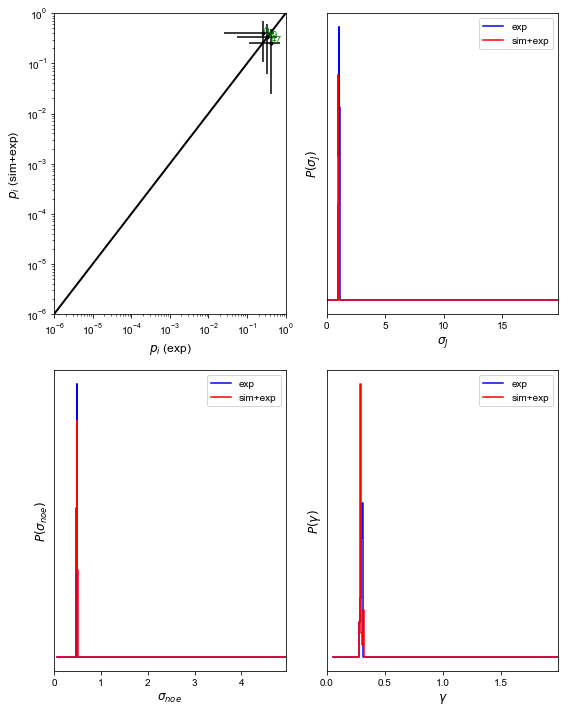

In [9]:
#########################################
# Let's do analysis using MBAR and plot figures
############ MBAR and Figures ###########
# Specify necessary argument values
%matplotlib inline
A = Analysis(100,dataFiles,outdir)    # number of states, input data files and output directory needs to be specified
A.plot()

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme.css", "r").read()
    return HTML(styles)
css_styling()